**Table of contents**   
1. [Import libraries and other useful code](#Import-libraries-and-other-useful-code)
2. [Read preprocessed data](#Read-preprocessed-data)
3. [Modelling](#Modelling)
    - [Correlation analysis](#Correlation-analysis)
    - [Classification modelling and model evaluation](#Classification-modelling-and-model-evaluation)
        - [Encoder df_classification](#encoder-df_classification)
        - [Data split](#data-split)
        - [Training models](#traning-models)
            - [Logistic model](#logistic-model)
            - [KNN regression](#knn-regression)
            - [Random Forest](#random-forest)
            - [Fast Machine Learning (Pycaret)](#Fast-Machine-Learning-Pycaret)

# Import libraries and other useful code

In [2]:
import numpy as np
import pandas as pd
import json
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# classification 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *

# Read preprocessed data

In [3]:
df = pd.read_csv('Data/titanic_preprocessed.csv')

# Modelling

## Correlation analysis

In [5]:
df_corr = df.copy()

In [4]:
df_corr

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S,Special
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss.
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,Unknown,S,Miss.
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Mr.


In [6]:
# Create encoder dictionary
mapeo_sex = {'male':1, 'female':2} # save json
mapeo_embarked = {'S':1,'C':2,'Q':3} # save json

# Replace categoric variables using the dictionary
df_corr.loc[:,'Sex'] = df_corr['Sex'].replace(mapeo_sex)
df_corr.loc[:,'Embarked'] = df_corr['Embarked'].replace(mapeo_embarked)

# Save encoder dictionaries as json file
# with open('outputs/encoder_sex.json', 'w') as archivo:
#     json.dump(mapeo_sex, archivo)
# with open('outputs/encoder_embarked.json', 'w') as archivo:
#     json.dump(mapeo_embarked, archivo)

In [8]:
# Create decoder dictionary
decoder_sex = {1:'male', 2:'female'} # save json
# Save decoder dictionarie as json file
with open('outputs/decoder_sex.json', 'w') as archivo:
    json.dump(decoder_sex, archivo)

# decoder_survived = {1:'Sobrevive', 2:'No sobrevive'} # save json
# # Save decoder dictionarie as json file
# with open('outputs/decoder_survived.json', 'w') as archivo:
#     json.dump(decoder_survived, archivo)

In [17]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [19]:
# convert to int
df_corr['Sex'] = df_corr['Sex'].astype(int)
df_corr['Embarked'] = df_corr['Embarked'].astype(int)

In [20]:
# Spearman's method 
corr = df_corr.corr(method='spearman', numeric_only=True)

In [24]:
# Analysis of variables highly correlated with Survived

threshold = 0.2
corr[(corr>threshold)|(corr<-threshold)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.339668,0.543351,NaN,NaN,NaN,0.320491,NaN
Pclass,-0.339668,1.000000,NaN,-0.318184,NaN,NaN,-0.684421,NaN
Sex,0.543351,NaN,1.000000,NaN,NaN,0.254512,0.257941,NaN
Age,NaN,-0.318184,NaN,1.000000,NaN,-0.217283,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.000000,0.450014,0.451267,NaN
Parch,NaN,NaN,0.254512,-0.217283,0.450014,1.000000,0.407094,NaN
Fare,0.320491,-0.684421,0.257941,NaN,0.451267,0.407094,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Classification modelling and model evaluation

### Encoder df_classification

In [4]:
# create a df for the classification model --> target: survived
df_classification = df[['Pclass','Sex',
		 'Fare',
		 'Age','Survived']]

In [27]:
# Replace the sex variable with numbers using the mapping dictionary
df_classification.loc[:,'Sex'] = df_classification['Sex'].replace(mapeo_sex)

C:\Users\kina5\AppData\Local\Temp\ipykernel_31076\2415202305.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classification.loc[:,'Sex'] = df_classification['Sex'].replace(mapeo_sex)


KeyError: 'Embarked'

### Data split

In [28]:
# assign the independent variables and the dependent variable. Our target variable is Survived
X = df_classification.drop(['Survived'], axis=1)
y = df_classification['Survived']

# split the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = .25, random_state=7)

In [29]:
# Normalisation

#Initiating the scaler
scaler = StandardScaler()
 
#Normalise training variables
X_train_scaled = scaler.fit_transform(X_train)
 
#We apply the same normalisation to the test 
X_test_scaled = scaler.transform(X_test)

In [30]:
# save scaler
joblib.dump(scaler, 'outputs/scaler_classif.pkl')

['outputs/scaler_classif.pkl']

### Traning models:

#### Logistic model

In [33]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(max_iter =1000) 
# Train data
logreg.fit(X_train_scaled, y_train)  
# Predict
y_pred = logreg.predict(X_test_scaled)
# Classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       137
           1       0.71      0.67      0.69        86

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



#### KNN regression

In [34]:
#Parameters
weights = 'distance'
p = 2
n_neighbours = 5
#Model
clf = KNeighborsClassifier(n_neighbors = n_neighbours, weights = weights, p = p)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       137
           1       0.73      0.72      0.73        86

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



#### Random Forest

In [35]:
RFC = RandomForestClassifier()
RFC.fit(X_train_scaled, y_train)
y_preds = RFC.predict(X_test_scaled)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       137
           1       0.72      0.76      0.74        86

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



### Fast Machine Learning (PyCaret)

In [49]:
df_pycaret = df[['Pclass','Sex',
		 'Fare',
		 'Age','Survived']]

In [50]:
# Set the target: Survived
setup = setup(data = df_pycaret, target = 'Survived',session_id = 357)	

,Description,Value
0,Session id,357
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 5)"
4,Transformed data shape,"(891, 5)"
5,Transformed train set shape,"(623, 5)"
6,Transformed test set shape,"(268, 5)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


In [53]:
# compare models and choose the best
best = compare_models()

In [58]:
best

DummyClassifier(constant=None, random_state=357, strategy='prior')

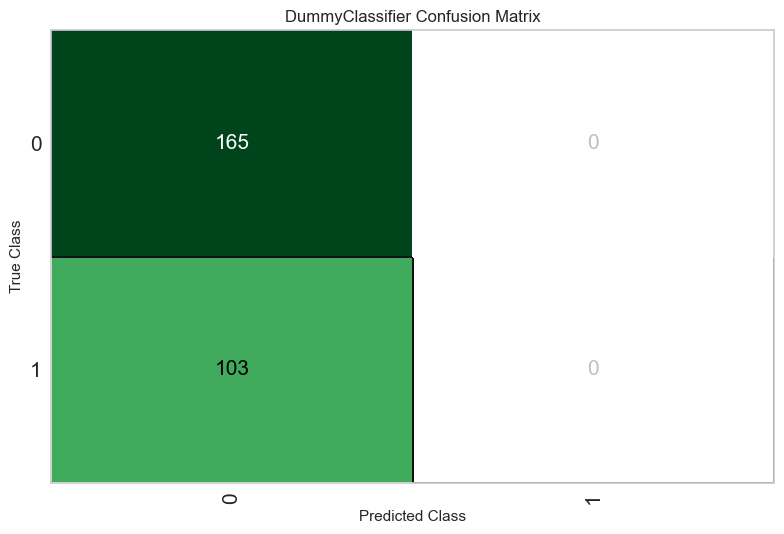

In [54]:
# Analyze best model

# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

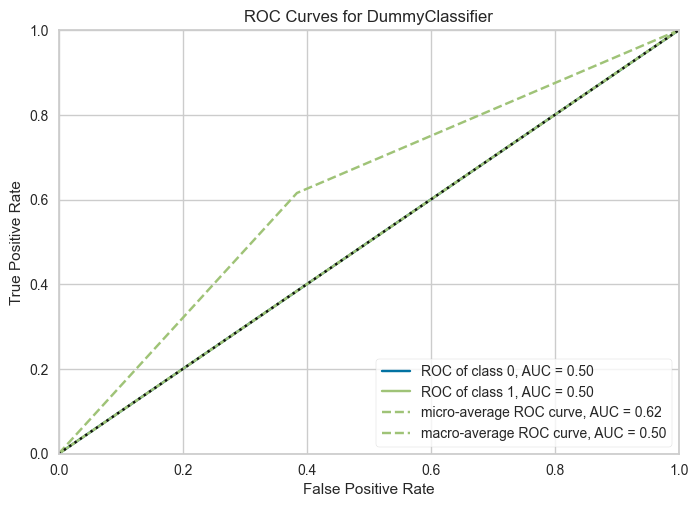

In [55]:
# plot AUC
plot_model(best, plot = 'auc')

In [63]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# Crear el DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")  # Puedes elegir la estrategia que desees

# Entrenar el modelo
dummy_clf.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = dummy_clf.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.547085201793722


Accuracy is lower than Random Forest. We've kept RFC as best model

In [64]:
#save best model

joblib.dump(RFC, 'models/survived_RFC.pkl') 

['models/survived_RFC.pkl']